# Job Sheet 6

### Lab Work 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load data
df = pd.read_csv('wbc.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Check null
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# Features selection

# Slice dataframe from 'radius_mean' to 'fractal_dimension_worst'
X = df.iloc[:,3:-1]
y = df['diagnosis']
y = y.map({'M':1, 'B':0}) # Encode label

# Check features numbers and instance numbers
X.shape

(569, 29)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
# By default, DT in scikit-learn will use "Gini" as split criteria
# Read the documentation for more detail
dt = DecisionTreeClassifier()

# Fitting / train DT model
dt.fit(X_train, y_train)

# Predict test set
y_pred_dt = dt.predict(X_test)

#  Calculate the accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.93
Test set accuracy: 0.9298245614035088


In [8]:
# We will use estimator=10 in this model
# You can read the documentation to understand the hyperparameter of RF in scikit-learn

rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Fitting / training
rf.fit(X_train, y_train)

# Predict the test set
y_pred_rf = rf.predict(X_test)

#  Calculate the accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.96
Test set accuracy: 0.956140350877193


### Lab Work 2

In [9]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import AdaBoostClassifier # import AdaBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder # Kebutuhan encoding label

In [10]:
# Load data
df = pd.read_csv('iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Cek kolom null
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# Features selection
X = df.iloc[:,2:-1]
y = df['Species']

# Label encoding
ec = LabelEncoder()
y = ec.fit_transform(y)

# Check the number of features and instances
print(X.shape)

# Check instances label
print(y)

(150, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
dt = DecisionTreeClassifier()

# Fit model
dt.fit(X_train, y_train)

# Predict the test set
y_pred_dt = dt.predict(X_test)

# Calculate the accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.97
Test set accuracy: 0.9666666666666667


In [15]:
ada = AdaBoostClassifier(n_estimators=2)

# Fit to AdaBoost Model
ada.fit(X_train, y_train)

# Predict the test set
y_pred_ada = ada.predict(X_test)

# Calculate the accuracy
acc_ada = accuracy_score(y_test, y_pred_ada)
print("Test set accuracy: {:.2f}".format(acc_ada))
print(f"Test set accuracy: {acc_ada}")

Test set accuracy: 0.97
Test set accuracy: 0.9666666666666667


### Lab Work 3

In [16]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())


clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)

0.8947368421052632

### Lab Work 4

In [17]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB # import Naive Bayes model Gaussian (asumsi data terdistribusi normal)
from sklearn.svm import SVC # import SVM classifier
from sklearn.ensemble import VotingClassifier # import model Voting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# Load Data
dbt = pd.read_csv('diabetes.csv')

dbt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
# Check columns name
dbt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
# Check null values
dbt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
# Check column with 0 value
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(dbt.loc[dbt[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [22]:
# Impute 0 with mean value
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

dbt[feature_columns] = fill_values.fit_transform(dbt[feature_columns])

In [23]:
X = dbt[feature_columns]
y = dbt.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Standarisasi pada fitur di X_train dan X_test
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
gnb_std = GaussianNB()

# Fit with standarized features
gnb_std.fit(X_train_std, y_train)

# Predict the test set
y_pred_gnb = gnb_std.predict(X_test_std)

# Evaluate test set
acc_gnb = accuracy_score(y_test, y_pred_gnb)

# Print the result
print("Test set accuracy: {:.2f}".format(acc_gnb))
print(f"Test set accuracy: {acc_gnb}")

Test set accuracy: 0.74
Test set accuracy: 0.7359307359307359


In [26]:
svm_lin = SVC(kernel='linear')

# Fitting
svm_lin.fit(X_train_std, y_train)

# Predict
y_pred_svm_lin = svm_lin.predict(X_test_std)

# Evaluate test set
acc_svm_lin = accuracy_score(y_test, y_pred_svm_lin)

# Show the result
print("Test set accuracy: {:.2f}".format(acc_svm_lin))
print(f"Test set accuracy: {acc_svm_lin}")

Test set accuracy: 0.74
Test set accuracy: 0.7402597402597403


In [27]:
svm_rbf = SVC(kernel='rbf')

# Fitting
svm_rbf.fit(X_train_std, y_train)

# Predict
y_pred_svm_rbf = svm_rbf.predict(X_test_std)

# Evaluate test set
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

# Print
print("Test set accuracy: {:.2f}".format(acc_svm_rbf))
print(f"Test set accuracy: {acc_svm_rbf}")

Test set accuracy: 0.72
Test set accuracy: 0.7229437229437229


In [28]:
# Define meta classifier
clf1 = GaussianNB()
clf2 = SVC(kernel='linear')
clf3 = SVC(kernel='rbf', probability=True)

# Define voting model --> Hard
voting = VotingClassifier(estimators=[('GaussianNB', clf1), ('SVM-LIN', clf2), ('SVM-RBF', clf3)], voting='hard')

# Fitting
voting.fit(X_train_std, y_train)

# Predict
y_pred_vt1 = voting.predict(X_test_std)

# Evaluate
acc_vt1 = accuracy_score(y_test, y_pred_vt1)

# Show the result
print('Voting Hard')
print("Test set accuracy: {:.2f}".format(acc_vt1))
print(f"Test set accuracy: {acc_vt1}")

Voting Hard
Test set accuracy: 0.74
Test set accuracy: 0.7402597402597403


## Lab Assignment

### Task 1

Step 0 - Import Library

In [29]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Step 1 - Load data

In [33]:
# Load data
df = pd.read_csv('mushrooms.csv')

df.head(20)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [32]:
# Check null
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [64]:
# Features selection
ec = LabelEncoder()
# Slice dataframe from 'radius_mean' to 'fractal_dimension_worst'
X = df.iloc[:, 2:]
y = df['class']
#Label
y = ec.fit_transform(y)

# Label encoding

X = X.apply(ec.fit_transform)


# Check features numbers and instance numbers
print(X)

      cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  \
0               2          4        1     6                1             0   
1               2          9        1     0                1             0   
2               2          8        1     3                1             0   
3               3          8        1     6                1             0   
4               2          3        0     5                1             1   
...           ...        ...      ...   ...              ...           ...   
8119            2          4        0     5                0             0   
8120            2          4        0     5                0             0   
8121            2          4        0     5                0             0   
8122            3          4        0     8                1             0   
8123            2          4        0     5                0             0   

      gill-size  gill-color  stalk-shape  stalk-root  ...  \
0 

Step 3 - Split data

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Step 4 - Train  Decision tree classifier model

In [66]:
# By default, DT in scikit-learn will use "Gini" as split criteria
# Read the documentation for more detail
dt = DecisionTreeClassifier()

# Fitting / train DT model
dt.fit(X_train, y_train)

# Predict test set
y_pred_dt = dt.predict(X_test)

#  Calculate the accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 1.00
Test set accuracy: 1.0


Step 5 - Train Random Forest Classifier Model

In [59]:
# We will use estimator=10 in this model
# You can read the documentation to understand the hyperparameter of RF in scikit-learn

rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Fitting / training
rf.fit(X_train, y_train)

# Predict the test set
y_pred_rf = rf.predict(X_test)

#  Calculate the accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 1.00
Test set accuracy: 1.0


In [67]:
from sklearn.ensemble import AdaBoostClassifier # import AdaBoost

ada = AdaBoostClassifier(n_estimators=2)

# Fit to AdaBoost Model
ada.fit(X_train, y_train)

# Predict the test set
y_pred_ada = ada.predict(X_test)

# Calculate the accuracy
acc_ada = accuracy_score(y_test, y_pred_ada)
print("Test set accuracy: {:.2f}".format(acc_ada))
print(f"Test set accuracy: {acc_ada}")

Test set accuracy: 0.84
Test set accuracy: 0.8449230769230769


### Task 2

Step 7 - Build Adaboost Model

In [68]:
from sklearn.ensemble import AdaBoostClassifier # import AdaBoost

ada = AdaBoostClassifier(n_estimators=2)

# Fit to AdaBoost Model
ada.fit(X_train, y_train)

# Predict the test set
y_pred_ada = ada.predict(X_test)

# Calculate the accuracy
acc_ada = accuracy_score(y_test, y_pred_ada)
print("Test set accuracy: {:.2f}".format(acc_ada))
print(f"Test set accuracy: {acc_ada}")

Test set accuracy: 0.84
Test set accuracy: 0.8449230769230769


### Task 3 

Step 0 - Import Library

In [69]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB # import Naive Bayes model Gaussian (asumsi data terdistribusi normal)
from sklearn.svm import SVC # import SVM classifier
from sklearn.ensemble import VotingClassifier # import model Voting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Step 1 - Import Data

In [70]:
# Load Data
dbt = pd.read_csv('diabetes.csv')

dbt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step 2 - Check column names

In [71]:
# Check columns name
dbt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Step 2.3 - Check Null values

In [72]:
# Check null values
dbt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Step 2.4 - Data imputation

In [73]:
# Check column with 0 value
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(dbt.loc[dbt[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


perform data imputation

In [74]:
# Impute 0 with mean value
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

dbt[feature_columns] = fill_values.fit_transform(dbt[feature_columns])

Step 3 - Visualize data

c:\Users\filla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


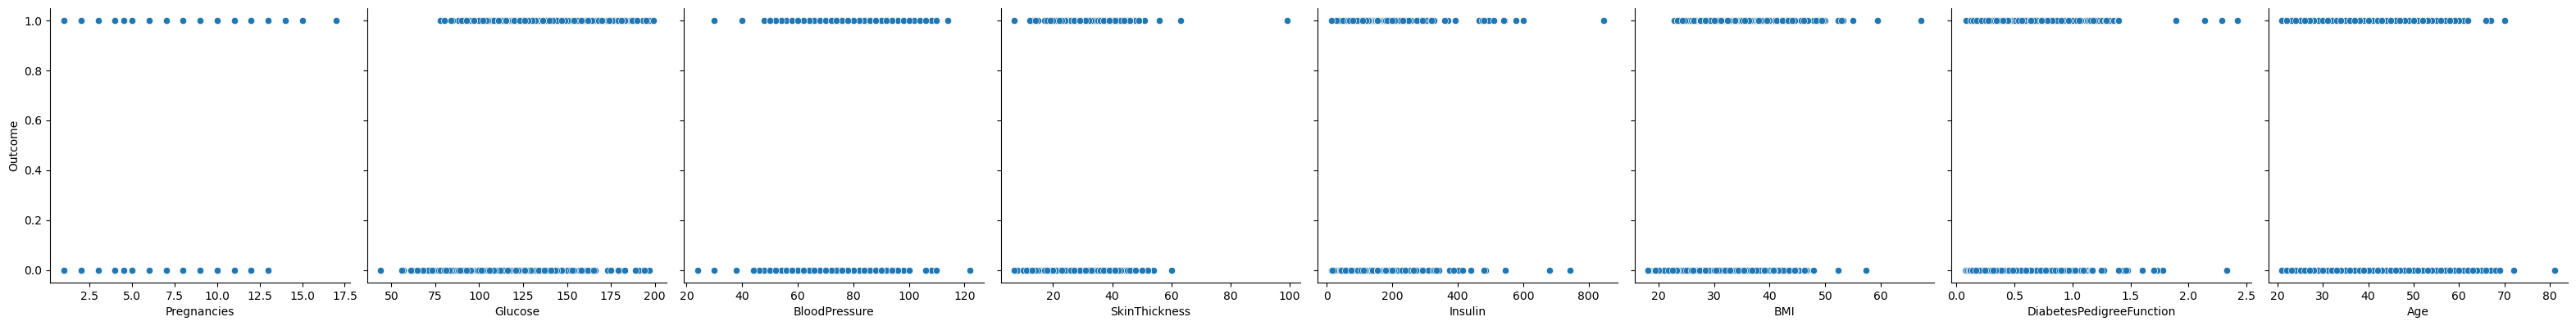

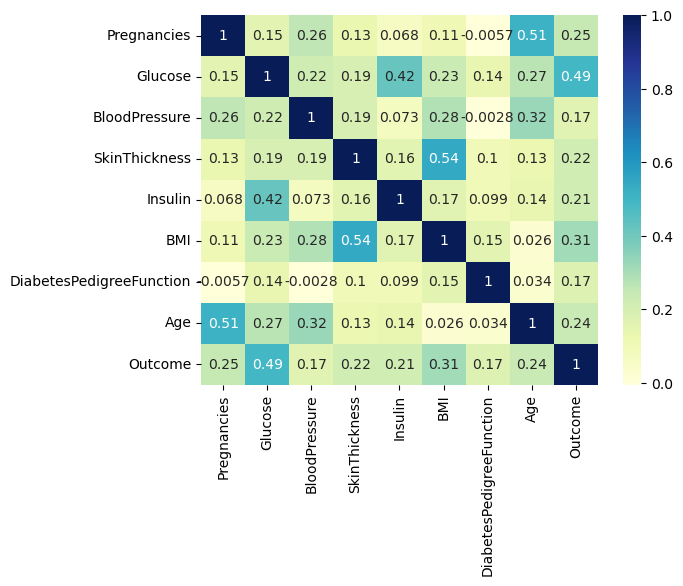

In [77]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

# visualize the data using pairplot
sns.pairplot(dbt, x_vars=dbt[feature_columns],
             y_vars='Outcome', size=4, aspect=1, kind='scatter')
plt.show()

# visualize the data correlation using heatmaps
sns.heatmap(dbt.corr(), cmap="YlGnBu", annot=True)
plt.show()

Step 4 - Build Regression Model

In [83]:
# X is independen variabel, Y is dependen variable
X = dbt['Insulin']
y = dbt['Outcome']

Split training and testing

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Build regression model

In [86]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

Visualize model

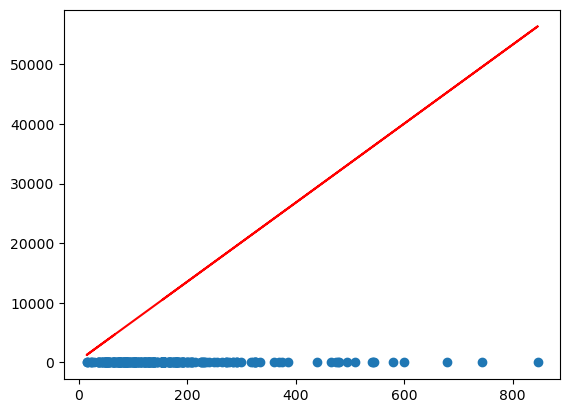

In [87]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

Step 5 - Residual Analysis

C:\Users\filla\AppData\Local\Temp\ipykernel_3076\42056552.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


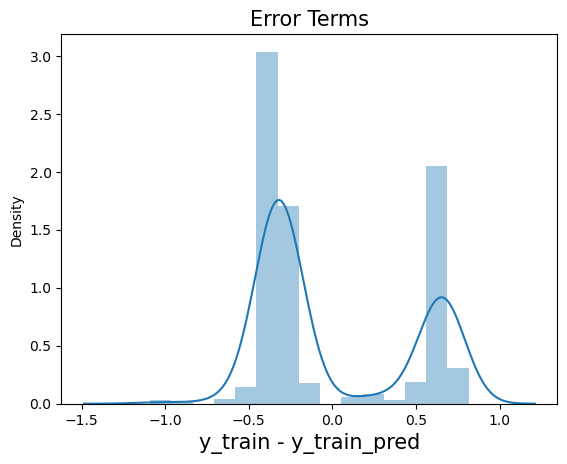

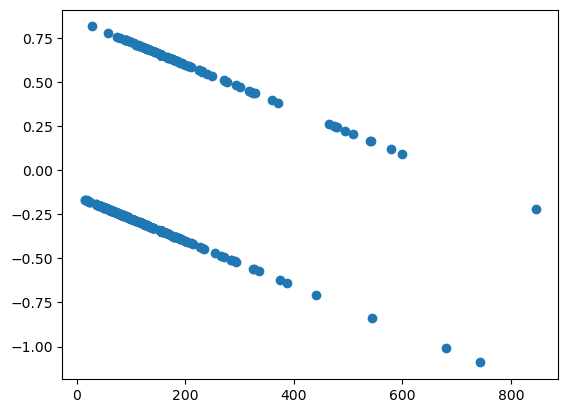

In [88]:
# Make prediction
y_train_pred = lr.predict(X_train_sm)

# Calculate residual
res = (y_train - y_train_pred)

# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

Step 6 - Make a prediction

In [90]:
# Make a prediction using testing data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm) 
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Step 7 - Visualize model

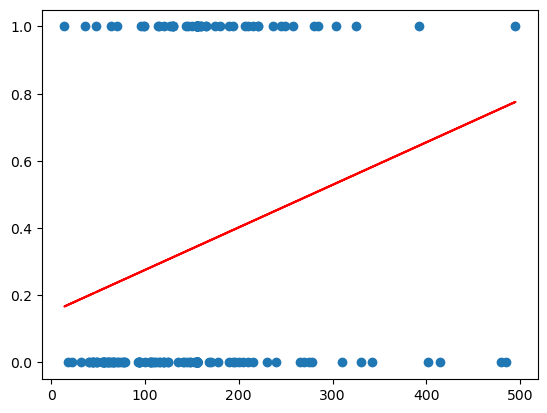

In [91]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()